<a href="https://colab.research.google.com/github/kmanisgithub/Stock-Prices-Prediction-Using-Machine-Learning-and-Python/blob/main/Stock_Price_Pridiction_Using_Python_%26_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
#Load the data
from google.colab import files
uploded=files.upload()

Saving Reliance _Stock.csv to Reliance _Stock.csv


In [ ]:
#Store the data into a data frame
df=pd.read_csv('Reliance _Stock.csv')
df.head(6)

,Date,Open Price,Close Price,Adj Close Price,Volume
0,5/13/2022 15:30:00,2426.00,2426.60,2426.60,8910998
1,5/16/2022 15:30:00,2434.45,2427.20,2427.20,6201594
2,5/17/2022 15:30:00,2435.10,2529.15,2529.15,7638666
3,5/18/2022 15:30:00,2539.65,2538.35,2538.35,7973235
4,5/19/2022 15:30:00,2484.00,2479.85,2479.85,6783641
5,5/20/2022 15:30:00,2512.50,2624.45,2624.45,10057508


In [ ]:
#Get the number of trading days
df.shape

(537, 5)

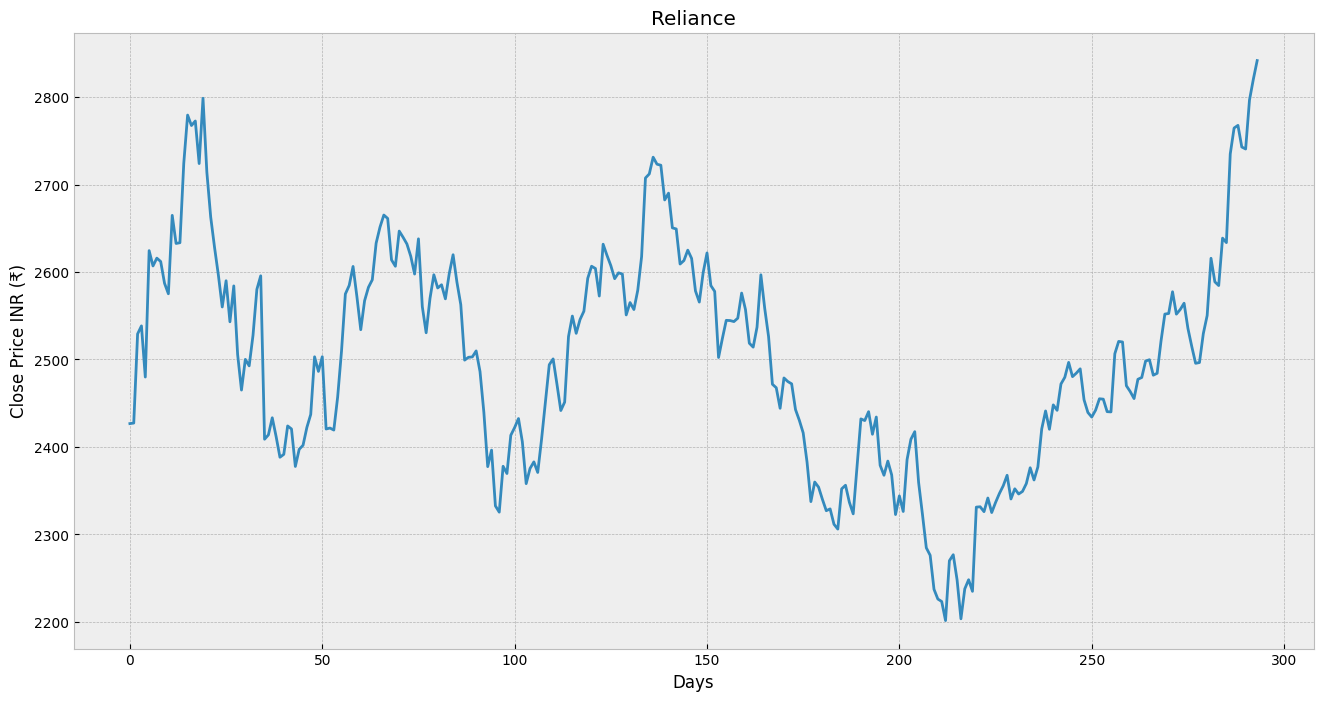

In [ ]:
#Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Reliance')
plt.xlabel('Days')
plt.ylabel('Close Price INR (₹)')
plt.plot(df['Close Price'])
plt.show()

In [ ]:
#Get the close Price
df=df[['Close Price']]
df.head(4)

,Close Price
0,2426.60
1,2427.20
2,2529.15
3,2538.35


In [ ]:
#Creat a variable ot Pridict 'X' days out into the future
future_days=45
#Create a new column (target) shifted 'X' units/days up
df['Prediction'] = df[['Close Price']].shift(-future_days)
df.tail(6)

,Close Price,Prediction
288,2767.75,NaN
289,2743.00,NaN
290,2740.70,NaN
291,2796.70,NaN
292,2820.45,NaN
293,2841.85,NaN


In [ ]:
# Create a variable to predict 'X' days out into the future
future_days = 45

# Create a new column ('Prediction') shifted 'X' units/days up
df['Prediction'] = df['Close Price'].shift(-future_days)

# Display the last 6 rows of the DataFrame to see the changes
df.tail(6)


,Close Price,Prediction
288,2767.75,NaN
289,2743.00,NaN
290,2740.70,NaN
291,2796.70,NaN
292,2820.45,NaN
293,2841.85,NaN


In [ ]:
#Create the feature data set (X) and convert it to numpy array and remove the last 'X' rows/days
X=np.array(df.drop(['Prediction'], 1)) [:-future_days]
print(X)

[[2426.6 ]
 [2427.2 ]
 [2529.15]
 [2538.35]
 [2479.85]
 [2624.45]
 [2606.9 ]
 [2615.85]
 [2612.  ]
 [2587.1 ]
 [2575.1 ]
 [2664.8 ]
 [2632.65]
 [2633.5 ]
 [2724.3 ]
 [2779.5 ]
 [2767.55]
 [2772.75]
 [2724.05]
 [2798.75]
 [2714.25]
 [2662.9 ]
 [2628.1 ]
 [2596.3 ]
 [2560.  ]
 [2590.  ]
 [2543.05]
 [2584.1 ]
 [2505.6 ]
 [2464.95]
 [2500.05]
 [2492.65]
 [2527.7 ]
 [2580.15]
 [2595.65]
 [2408.7 ]
 [2413.7 ]
 [2433.25]
 [2411.85]
 [2388.1 ]
 [2391.4 ]
 [2423.9 ]
 [2420.45]
 [2377.55]
 [2397.15]
 [2401.8 ]
 [2422.25]
 [2437.1 ]
 [2503.  ]
 [2486.3 ]
 [2503.1 ]
 [2420.4 ]
 [2421.5 ]
 [2419.2 ]
 [2457.1 ]
 [2509.45]
 [2574.85]
 [2584.65]
 [2606.35]
 [2571.9 ]
 [2534.  ]
 [2567.15]
 [2582.5 ]
 [2591.1 ]
 [2633.  ]
 [2651.3 ]
 [2665.15]
 [2661.3 ]
 [2613.85]
 [2606.6 ]
 [2646.8 ]
 [2639.75]
 [2632.05]
 [2618.  ]
 [2597.65]
 [2637.95]
 [2560.4 ]
 [2530.5 ]
 [2569.8 ]
 [2596.85]
 [2581.75]
 [2585.4 ]
 [2569.3 ]
 [2598.05]
 [2619.75]
 [2588.35]
 [2562.7 ]
 [2499.2 ]
 [2502.45]
 [2502.85]
 [2509.75]

<ipython-input-43-929341cc1faa>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=np.array(df.drop(['Prediction'], 1)) [:-future_days]


In [ ]:
#Create the target data set (y) and convert it to a numpy array and get all of the target values except the
y=np.array(df['Prediction']) [:-future_days]
print(y)

[2401.8  2422.25 2437.1  2503.   2486.3  2503.1  2420.4  2421.5  2419.2
 2457.1  2509.45 2574.85 2584.65 2606.35 2571.9  2534.   2567.15 2582.5
 2591.1  2633.   2651.3  2665.15 2661.3  2613.85 2606.6  2646.8  2639.75
 2632.05 2618.   2597.65 2637.95 2560.4  2530.5  2569.8  2596.85 2581.75
 2585.4  2569.3  2598.05 2619.75 2588.35 2562.7  2499.2  2502.45 2502.85
 2509.75 2486.1  2439.5  2377.35 2396.25 2332.45 2325.3  2377.75 2369.5
 2413.2  2422.1  2432.35 2405.8  2357.9  2375.25 2382.8  2370.7  2408.75
 2451.25 2493.9  2500.6  2471.6  2441.55 2451.15 2526.15 2549.6  2529.85
 2545.65 2555.15 2592.75 2606.6  2604.   2572.5  2631.8  2619.05 2607.3
 2592.35 2599.05 2597.65 2550.9  2565.05 2557.05 2579.1  2617.6  2707.55
 2712.2  2731.35 2723.3  2722.15 2682.45 2690.2  2650.5  2649.25 2609.1
 2613.1  2625.   2615.5  2578.35 2565.6  2599.3  2621.8  2584.5  2577.8
 2502.2  2524.05 2544.7  2544.45 2543.3  2547.2  2575.9  2557.05 2518.55
 2514.05 2536.9  2596.8  2558.4  2526.15 2471.6  2467.6  

In [ ]:
#Splite the data into 75% training and 25  testing
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.25)

In [ ]:
#Create the models
#Create the decision tree regressor model
tree=DecisionTreeRegressor().fit(x_train, y_train)
lr=LinearRegression().fit(x_train, y_train)

In [ ]:
#Get the last 'x' rows of the feature data set
x_future=df.drop(['Prediction'], 1) [:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

<ipython-input-47-003fbde5635b>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future=df.drop(['Prediction'], 1) [:-future_days]


array([[2417.35],
       [2359.25],
       [2322.7 ],
       [2284.5 ],
       [2275.95],
       [2237.05],
       [2225.9 ],
       [2223.1 ],
       [2201.25],
       [2269.7 ],
       [2276.6 ],
       [2247.8 ],
       [2203.3 ],
       [2237.55],
       [2248.  ],
       [2234.7 ],
       [2331.05],
       [2331.45],
       [2325.85],
       [2341.45],
       [2324.85],
       [2336.35],
       [2346.65],
       [2355.5 ],
       [2367.45],
       [2340.35],
       [2352.  ],
       [2346.05],
       [2349.  ],
       [2358.  ],
       [2376.05],
       [2362.1 ],
       [2377.05],
       [2420.5 ],
       [2441.05],
       [2420.1 ],
       [2448.  ],
       [2441.75],
       [2471.9 ],
       [2479.55],
       [2496.6 ],
       [2480.3 ],
       [2484.35],
       [2489.25],
       [2453.8 ]])

In [ ]:
#Show the model tree prediction
tree_prediction=tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear regression prediction
lr_prediction=lr.predict(x_future)
print(lr_prediction)

[2331.05 2434.05 2441.95 2455.   2454.55 2440.25 2439.95 2439.95 2520.6
 2519.95 2454.55 2463.25 2455.2  2477.25 2479.35 2498.15 2499.65 2481.95
 2484.15 2564.3  2650.5  2552.55 2577.4  2551.8  2557.1  2564.3  2535.5
 2577.4  2495.55 2496.45 2599.3  2434.05 2615.7  2588.75 2584.5  2638.75
 2633.6  2735.05 2764.7  2767.75 2743.   2740.7  2796.7  2731.35 2841.85]

[2488.57996333 2489.44069783 2489.98217539 2490.54809721 2490.67476296
 2491.25105508 2491.41623907 2491.45772025 2491.78142161 2490.76735488
 2490.6651334  2491.09179698 2491.75105146 2491.24364773 2491.08883403
 2491.28586964 2489.85847258 2489.8525467  2489.93550906 2489.70439962
 2489.95032377 2489.77995463 2489.62736314 2489.49625298 2489.31921723
 2489.7206958  2489.54810446 2489.63625197 2489.59254858 2489.45921621
 2489.19181075 2489.39847591 2489.17699604 2488.533297   2488.22885476
 2488.53922288 2488.12589254 2488.21848447 2487.77182104 2487.65848852
 2487.40589776 2487.64737749 2487.58737793 2487.51478586 2488.03996

<ipython-input-57-9389f28c7419>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


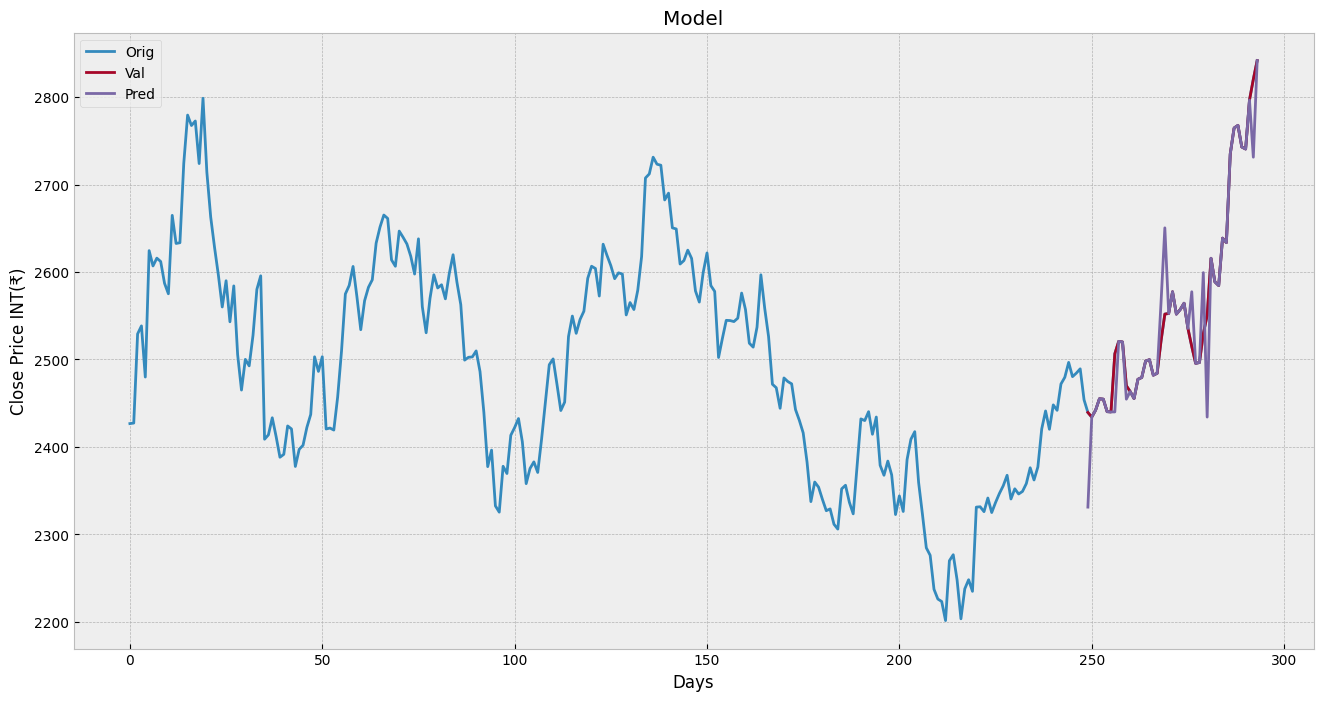

In [ ]:
#Visualize the data
predictions=tree_prediction

valid=df[X.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price INT(₹)')
plt.plot(df['Close Price'])
plt.plot(valid[['Close Price', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

<ipython-input-58-238ef852266f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


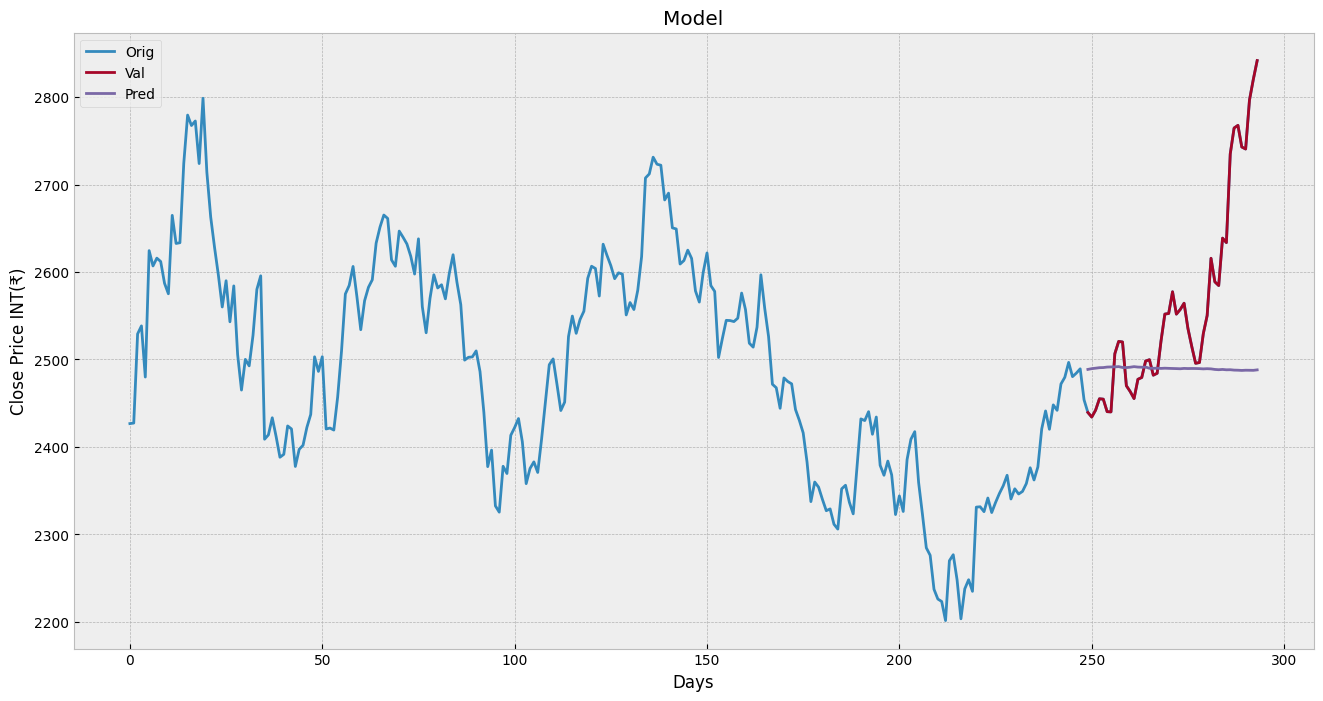

In [ ]:
#Visualize the data
predictions=lr_prediction

valid=df[X.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price INT(₹)')
plt.plot(df['Close Price'])
plt.plot(valid[['Close Price', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()